In [ ]:
#Predict price of houses in Boston using machine learning of Linear Regression

# We have some data from previous house sales
# 1050 sq ft, 2 bathroom sold for $100,000
# 450 sq ft, 1 br sold for 40,000
# 2000 sq ft, 3 br sold for 120,000
# 150 sq ft, 1 br sold for $23,000

# How much do you think a house with 1000 square feet and 3 bathrooms will sell for?

In [77]:
#I mport dependencies
import pandas as pd 
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [55]:
# Load the Boston Housing Data set from sklearn.datasets and print it
from sklearn.datasets import load_boston
boston = load_boston()
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [56]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [57]:
# data: contains the information for various houses
# target: prices of the house
# feature_names: names of the features
# DESCR: describes the dataset

In [58]:
print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [59]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [60]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [61]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [64]:
# Transfrom the dataset into a data frame
df_x = pd.DataFrame(boston.data, columns = boston.feature_names)
df_y = pd.DataFrame(boston.target)

In [73]:
#Get some statistics from the dataset, count, mean
df_x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [72]:
# Check the number of nulls. If there are nulls we can use dropna to drop all the null rows.
df_x.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [79]:
# Initialize the linear regression model
model = linear_model.LinearRegression()

In [89]:
# Split the data into 80% training and 20% testing data 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state=5)

In [90]:
# Train the model with our training data
model.fit(x_train, y_train)

LinearRegression()

In [92]:
# Print the coefficient/weights for each feature/column of the model 
print(model.coef_)

[[-1.30799852e-01  4.94030235e-02  1.09535045e-03  2.70536624e+00
  -1.59570504e+01  3.41397332e+00  1.11887670e-03 -1.49308124e+00
   3.64422378e-01 -1.31718155e-02 -9.52369666e-01  1.17492092e-02
  -5.94076089e-01]]


In [ ]:
# y = intercept + mx 

In [93]:
# Print the predictions on our test data
y_pred = model.predict(x_test)
print(y_pred)

[[37.56311787]
 [32.14445143]
 [27.06573629]
 [ 5.67080633]
 [35.09982577]
 [ 5.85803701]
 [27.53708506]
 [31.81019188]
 [26.35634771]
 [22.77208748]
 [31.91183048]
 [21.50224061]
 [23.70119983]
 [33.3622504 ]
 [28.51633591]
 [14.39456899]
 [ 0.19284025]
 [18.66247155]
 [13.71004139]
 [14.13408635]
 [ 2.03263952]
 [19.7280831 ]
 [38.18657429]
 [24.19760058]
 [31.30247973]
 [11.14144544]
 [25.03636951]
 [23.27970871]
 [22.49420127]
 [20.52972594]
 [15.16513744]
 [ 6.92553586]
 [18.3557733 ]
 [22.37179804]
 [28.91287973]
 [19.02980786]
 [30.19357214]
 [ 8.74384915]
 [40.86691522]
 [34.53763591]
 [20.70224878]
 [ 2.59618963]
 [29.99590282]
 [12.15704798]
 [27.10186397]
 [30.8052437 ]
 [-6.24169079]
 [19.84885777]
 [20.92973441]
 [12.43523958]
 [20.4949947 ]
 [19.19231742]
 [23.69073157]
 [12.67998473]
 [17.14252424]
 [25.04649176]
 [34.77758126]
 [15.23294903]
 [28.22306193]
 [21.08745388]
 [20.39506129]
 [25.79476888]
 [14.72463673]
 [33.18635032]
 [23.17771307]
 [13.11057248]
 [19.23154

In [94]:
# Print the actual values
print(y_test)

        0
226  37.6
292  27.9
90   22.6
373  13.8
273  35.2
..    ...
349  26.6
212  22.4
156  13.1
480  23.0
248  24.5

[102 rows x 1 columns]


In [95]:
# Check the model performace / accuracy using numpy (MSE (Mean Squared Error))
print(np.mean((y_pred - y_test)**2))

0    20.869292
dtype: float64


In [97]:
# Check the model performace / accuracy using MSE and sklearn.metrics
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

20.86929218377074


In [99]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.7334492147453084


In [102]:
x_test.iloc[1]

CRIM         0.03615
ZN          80.00000
INDUS        4.95000
CHAS         0.00000
NOX          0.41100
RM           6.63000
AGE         23.40000
DIS          5.11670
RAD          4.00000
TAX        245.00000
PTRATIO     19.20000
B          396.90000
LSTAT        4.70000
Name: 292, dtype: float64

In [105]:
test_df = {'CRIM':0.03615, 'ZN':80, 'INDUS':4, 'CHAS':0,'NOX':0.4,'RM':6,'AGE':50,'DIS':5,'RAD':4,'TAX':250,'PTRATIO':19, 'B':400, 'LSTAT':4.8}

In [40]:
# Now we need to determine which features?
boston_df.corr().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


In [ ]:
#The correlation coefficient ranges from -1 to 1. 
#If the value is close to 1, it means that there is a strong positive correlation between the two variables. 
#When it is close to -1, the variables have a strong negative correlation.

In [64]:
#Which features do you choose?

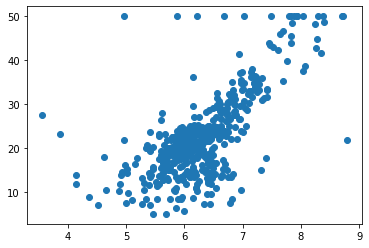

In [84]:
plt.scatter(df_x['RM'],df_y)

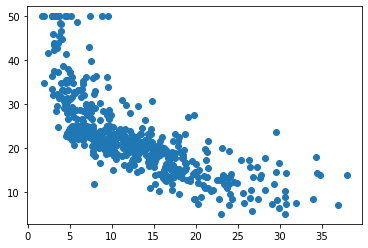

In [85]:
plt.scatter(df_x['LSTAT'],df_y)

In [48]:
# Preparing the data for training the model
# We concatenate the LSTAT and RM columns using np.c_ provided by the numpy library.
X = pd.DataFrame(np.c_[boston_df['LSTAT'], boston_df['RM']], columns = ['LSTAT','RM'])
Y = boston_df['MEDV']